<a href="https://colab.research.google.com/github/JuanSpecht/ML2021/blob/main/TP6/ML_TP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje de Máquina - TP6: Boston Housing Prices

## Cargo bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import metrics

## Cargo el dataset e inspecciono los atributos

In [ ]:
raw_df = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBHP/data/housing_data.csv")
raw_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Descripción de los atributos ([fuente](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)):

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
raw_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
print(raw_df.isnull().sum())
nans = pd.isnull(raw_df).sum().sum()
print('\nHay un %.0f%% de valores nulos en el dataset.' % (100*nans/raw_df.shape[0]))

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

Hay un 24% de valores nulos en el dataset.


In [ ]:
#Descarto las filas con valores faltantes
df = raw_df.dropna()

## Relaciones entre atributos

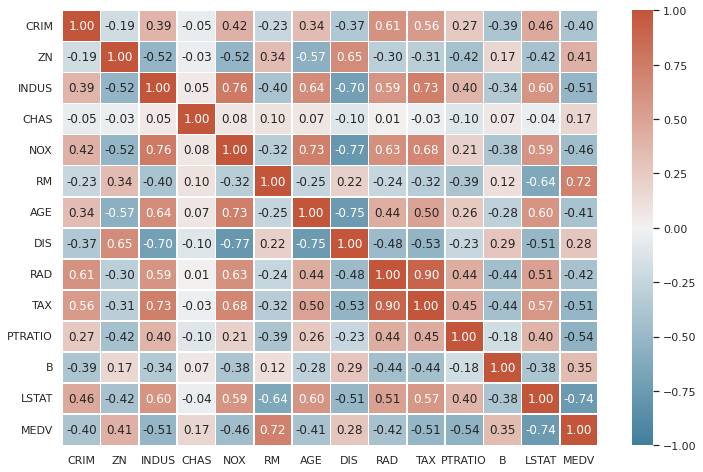

In [ ]:
corr = df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set_theme(style="white")

fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=False, linewidths=.5, annot=True, fmt='0.2f')

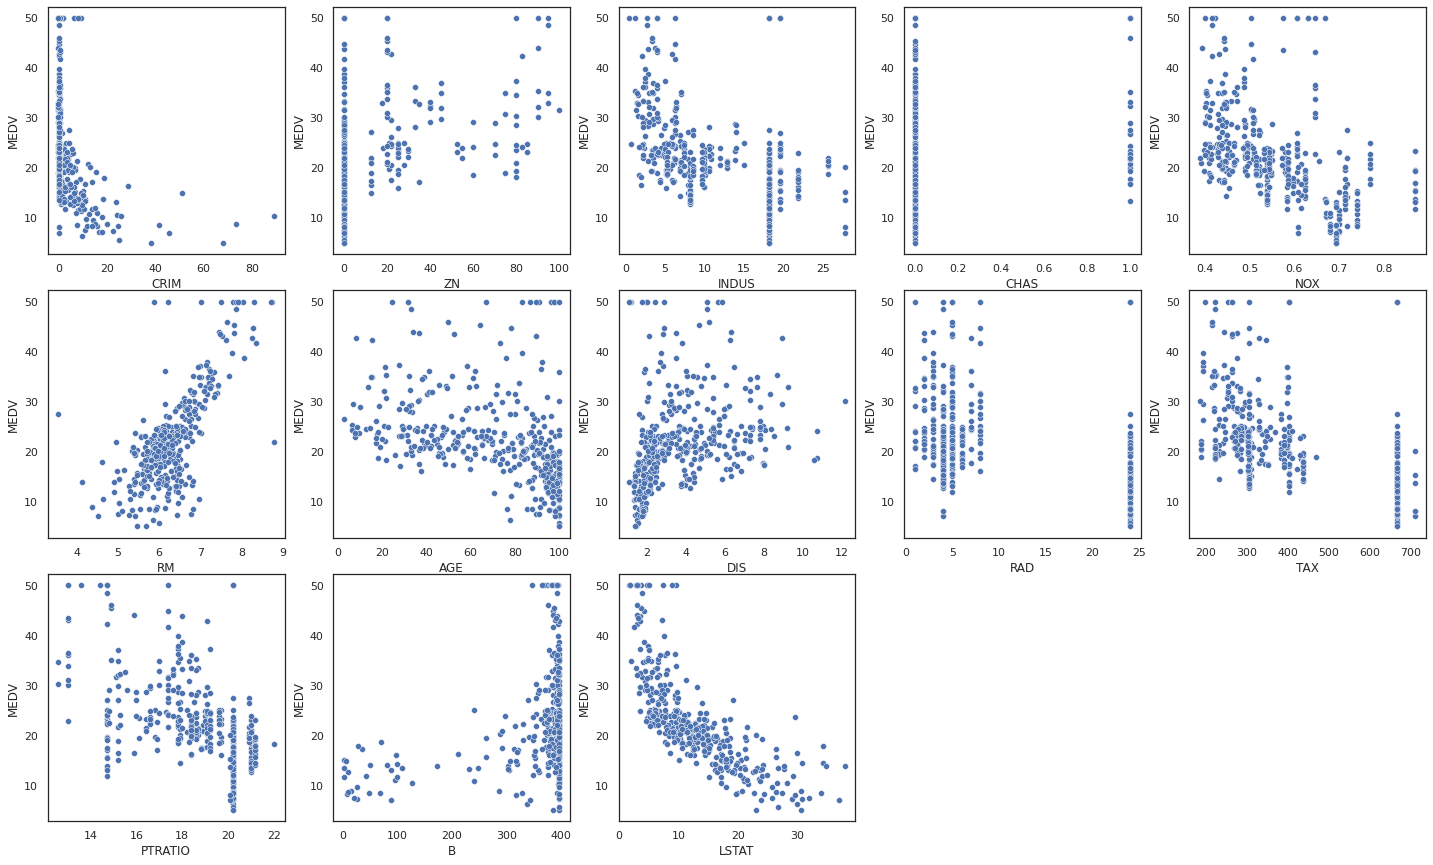

In [ ]:
fig, axs = plt.subplots(3,5, figsize=(20,12))
fig.tight_layout()
axs = axs.ravel()
for i in range(13):
    sns.scatterplot(data=df, x=df.columns[i], y='MEDV', ax=axs[i])

axs[13].axis('off')
axs[14].axis('off')
axs = axs.reshape(3,5)
plt.show()

* Como se ve en la matriz de correlación y en los scatters, los atributos que presentan una mayor correlación con `MEDV` (ya sea positiva o negativa) son `LSTAT` y `RM`, y en menor medida `INDUS`, `TAX`, `NOX`, `PTRATIO`, `RAD`.
* El atributo `CHAS` es el menos correlacionado con el target y con el resto de los atributos. Indica si la propiedad está o no en la orilla del río Charles ([fuente](http://sfb649.wiwi.hu-berlin.de/fedc_homepage/xplore/tutorials/mvahtmlnode11.html)).

Voy a hacer regresiones utilizando los siguientes métodos:

* Regresión lineal
* Ridge
* Lasso
* ElasticNet

Variando la cantidad de atributos utilizados, según el orden dado por su correlación con el target. Luego evalúo los modelos para determinar el error en función de los atributos utilizados para la regesión. La evaluación se realiza con las siguientes métricas:

* MSE
* MAE
* MAPE


## Regresión lineal

In [ ]:
# Ordeno los atributos según su correlación con MEDV
df = raw_df.dropna()
corr = df.corr()
corrs_df = abs(corr['MEDV']).sort_values(ascending=False)
df_sorted = df[corrs_df.index]

attributes_vec = []
scores_vec = []
mae_vec = []
mse_vec = []
mape_vec = []

# Entreno el modelo y obtengo los scores para cada caso
for i in range(len(corrs_df[1:14])):
    X = df_sorted.iloc[:,1:i+2]
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    linear_regressor = LinearRegression()
    fit = linear_regressor.fit(X_train, y_train)
    y_pred = fit.predict(X_test)

    attributes_vec.append(i+1)
    scores_vec.append(fit.score(X_train, y_train))
    mae_vec.append(metrics.mean_absolute_error(y_test, y_pred))
    mse_vec.append(metrics.mean_squared_error(y_test, y_pred))
    mape_vec.append(metrics.mean_absolute_percentage_error(y_test, y_pred))

A continuación se muestran tres métricas del error (MSE, MAE y MAPE) en función de la cantidad atributos utilizados para la regresión.

Las tres métricas indican que se minimiza el error al utilizar 12 de los 13 atributos, ignorando `CHAS`.

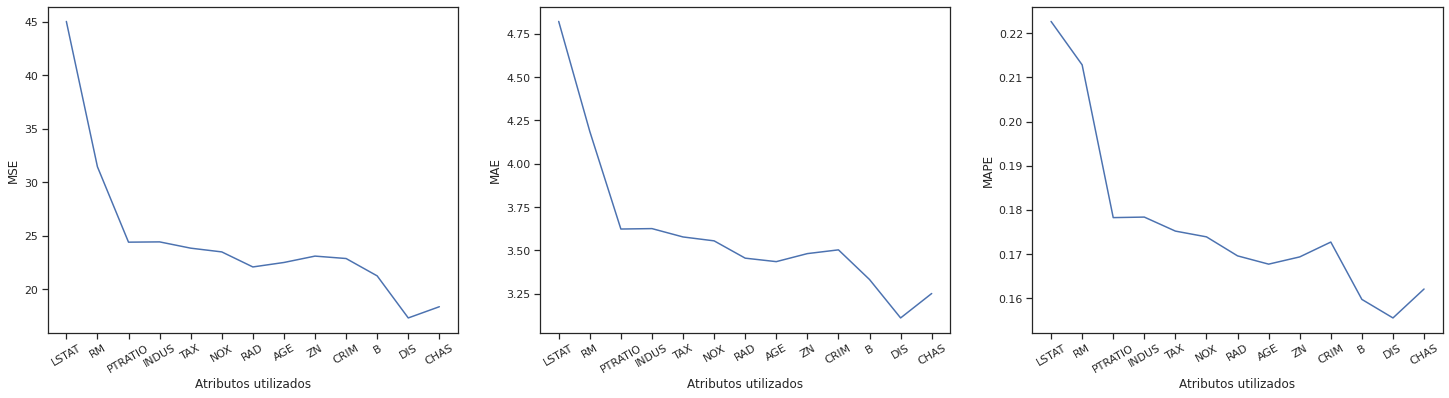

In [ ]:
# Grafico las métricas en función de la cantidad de atributos utilizados
sns.set(style="ticks", color_codes=True)
fig, axs = plt.subplots(ncols=3, figsize=(25,6))
metrics_list = [mse_vec, mae_vec, mape_vec]

metrics_names = ['MSE', 'MAE', 'MAPE']
i = 0
for metric in metrics_list:
    sns.lineplot(data=metric, ax=axs[i])
    axs[i].set_xticks(range(len(metric)))
    axs[i].set_xticklabels(corrs_df.index[1:],rotation=30)

    axs[i].set(xlabel='Atributos utilizados', ylabel=metrics_names[i])

    i += 1
plt.show()


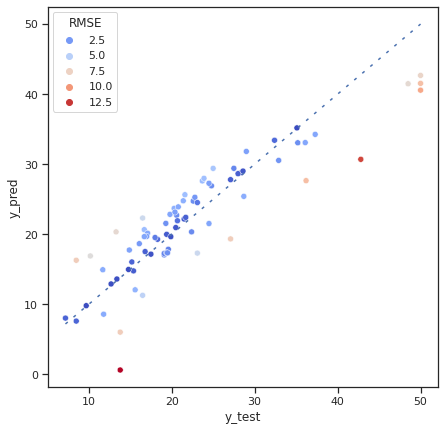

In [ ]:
X = df_sorted.iloc[:,1:13]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
fit = linear_regressor.fit(X_train, y_train)
y_pred = fit.predict(X_test)

test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'RMSE':np.sqrt((y_test-y_pred)**2)})
plt.subplots(figsize=(7,7))
sns.scatterplot(x='y_test', y='y_pred', hue='RMSE', palette='coolwarm', data = test_pred_df)

X_plot = np.linspace(test_pred_df['y_test'].min(), test_pred_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])
plt.show()

## Ridge

In [ ]:
df = raw_df.dropna()
corr = df.corr()
corrs_df = abs(corr['MEDV']).sort_values(ascending=False)
df_sorted = df[corrs_df.index]

attributes_vec = []
scores_vec = []
mae_vec = []
mse_vec = []
mape_vec = []

for i in range(len(corrs_df[1:14])):
    X = df_sorted.iloc[:,1:i+2]
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    ridge_regressor = Ridge()
    fit = ridge_regressor.fit(X_train, y_train)
    y_pred = fit.predict(X_test)

    attributes_vec.append(i+1)
    scores_vec.append(fit.score(X_train, y_train))
    mae_vec.append(metrics.mean_absolute_error(y_test, y_pred))
    mse_vec.append(metrics.mean_squared_error(y_test, y_pred))
    mape_vec.append(metrics.mean_absolute_percentage_error(y_test, y_pred))

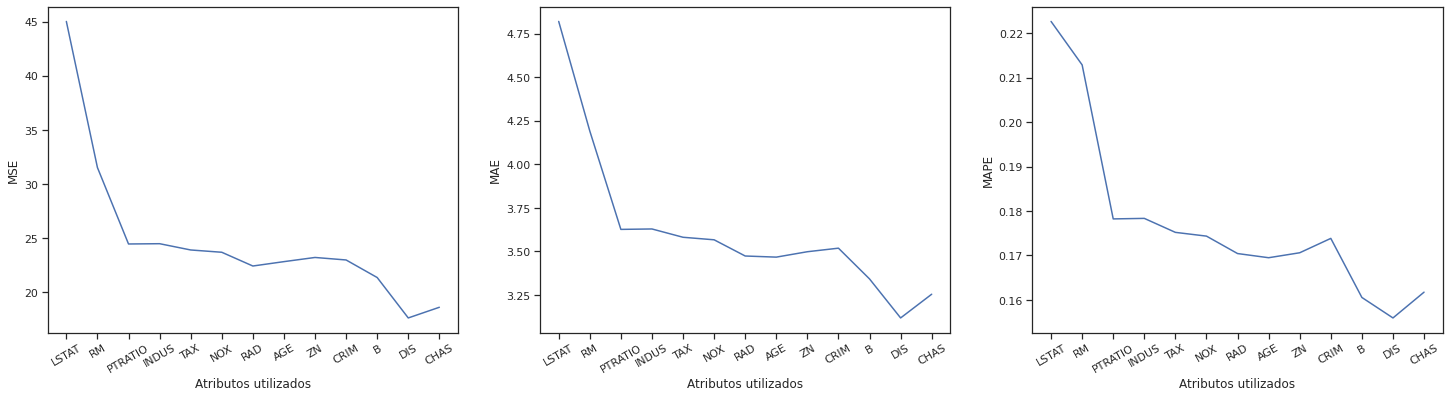

In [ ]:
sns.set(style="ticks", color_codes=True)
fig, axs = plt.subplots(ncols=3, figsize=(25,6))
metrics_list = [mse_vec, mae_vec, mape_vec]

metrics_names = ['MSE', 'MAE', 'MAPE']
i = 0
for metric in metrics_list:
    sns.lineplot(data=metric, ax=axs[i])
    axs[i].set_xticks(range(len(metric)))
    axs[i].set_xticklabels(corrs_df.index[1:],rotation=30)

    axs[i].set(xlabel='Atributos utilizados', ylabel=metrics_names[i])

    i += 1
plt.show()

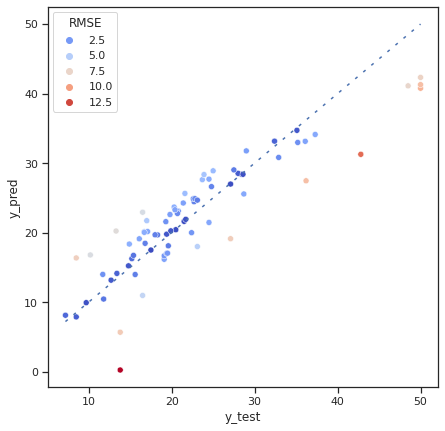

In [ ]:
X = df_sorted.iloc[:,1:13]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
fit = ridge_regressor.fit(X_train, y_train)
y_pred = fit.predict(X_test)

test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'RMSE':np.sqrt((y_test-y_pred)**2)})
plt.subplots(figsize=(7,7))
sns.scatterplot(x='y_test', y='y_pred', hue='RMSE', palette='coolwarm', data = test_pred_df)

X_plot = np.linspace(test_pred_df['y_test'].min(), test_pred_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])
plt.show()

## Lasso

In [ ]:
df = raw_df.dropna()
corr = df.corr()
corrs_df = abs(corr['MEDV']).sort_values(ascending=False)
df_sorted = df[corrs_df.index]

attributes_vec = []
scores_vec = []
mae_vec = []
mse_vec = []
mape_vec = []

for i in range(len(corrs_df[1:14])):
    X = df_sorted.iloc[:,1:i+2]
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    lasso_regressor = Lasso()
    fit = lasso_regressor.fit(X_train, y_train)
    y_pred = fit.predict(X_test)

    attributes_vec.append(i+1)
    scores_vec.append(fit.score(X_train, y_train))
    mae_vec.append(metrics.mean_absolute_error(y_test, y_pred))
    mse_vec.append(metrics.mean_squared_error(y_test, y_pred))
    mape_vec.append(metrics.mean_absolute_percentage_error(y_test, y_pred))

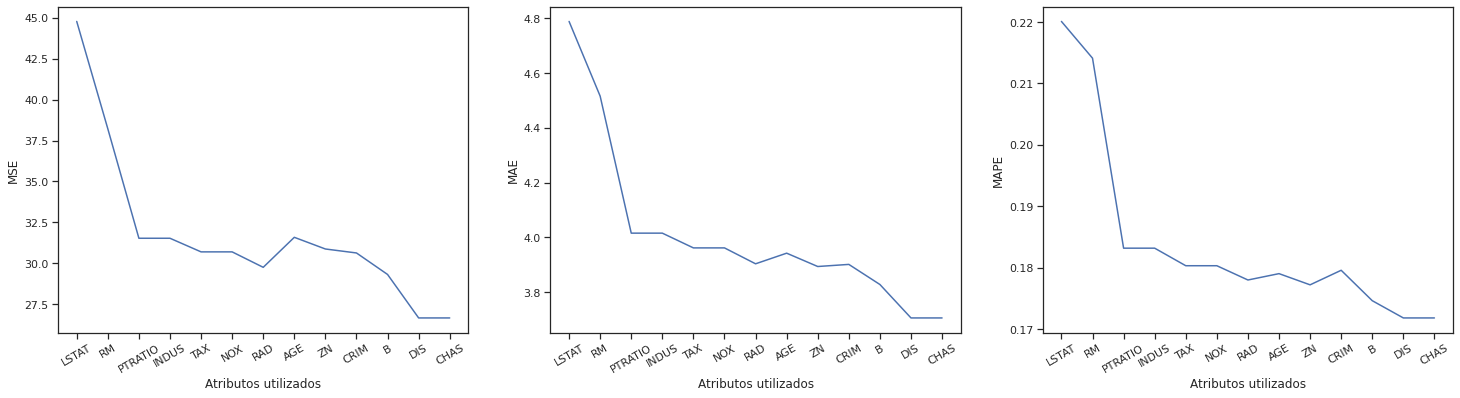

In [ ]:
sns.set(style="ticks", color_codes=True)
fig, axs = plt.subplots(ncols=3, figsize=(25,6))
metrics_list = [mse_vec, mae_vec, mape_vec]

metrics_names = ['MSE', 'MAE', 'MAPE']
i = 0
for metric in metrics_list:
    sns.lineplot(data=metric, ax=axs[i])
    axs[i].set_xticks(range(len(metric)))
    axs[i].set_xticklabels(corrs_df.index[1:],rotation=30)

    axs[i].set(xlabel='Atributos utilizados', ylabel=metrics_names[i])

    i += 1
plt.show()

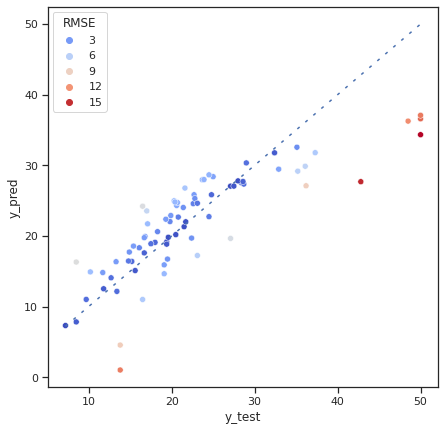

In [ ]:
X = df_sorted.iloc[:,1:13]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
fit = lasso_regressor.fit(X_train, y_train)
y_pred = fit.predict(X_test)

test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'RMSE':np.sqrt((y_test-y_pred)**2)})
plt.subplots(figsize=(7,7))
sns.scatterplot(x='y_test', y='y_pred', hue='RMSE', palette='coolwarm', data = test_pred_df)

X_plot = np.linspace(test_pred_df['y_test'].min(), test_pred_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])
plt.show()

## ElasticNet

In [ ]:
df = raw_df.dropna()
corr = df.corr()
corrs_df = abs(corr['MEDV']).sort_values(ascending=False)
df_sorted = df[corrs_df.index]

attributes_vec = []
scores_vec = []
mae_vec = []
mse_vec = []
mape_vec = []

for i in range(len(corrs_df[1:14])):
    X = df_sorted.iloc[:,1:i+2]
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    elastic_net_regressor = ElasticNet()
    fit = elastic_net_regressor.fit(X_train, y_train)
    y_pred = fit.predict(X_test)

    attributes_vec.append(i+1)
    scores_vec.append(fit.score(X_train, y_train))
    mae_vec.append(metrics.mean_absolute_error(y_test, y_pred))
    mse_vec.append(metrics.mean_squared_error(y_test, y_pred))
    mape_vec.append(metrics.mean_absolute_percentage_error(y_test, y_pred))

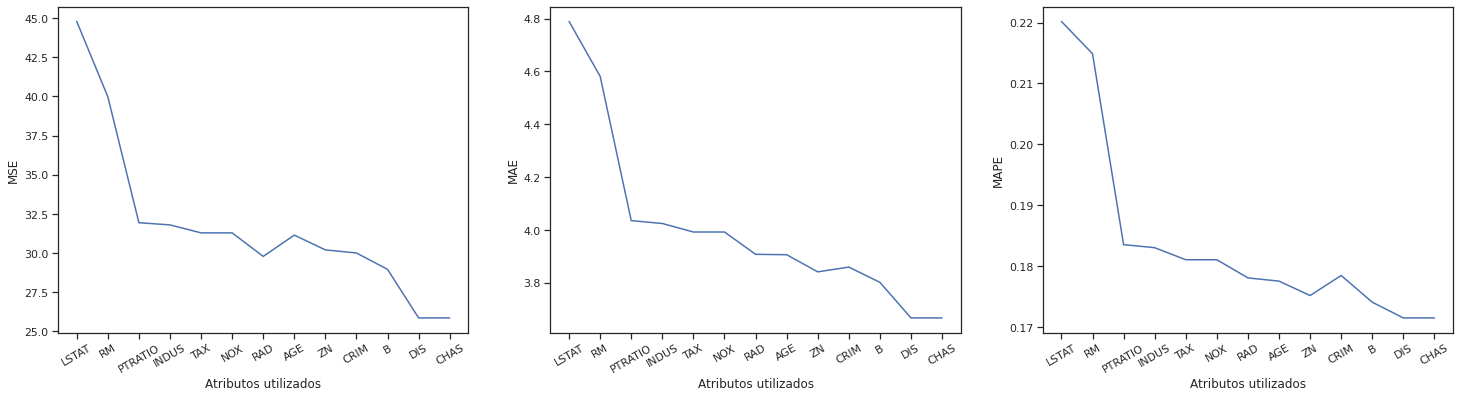

In [ ]:
sns.set(style="ticks", color_codes=True)
fig, axs = plt.subplots(ncols=3, figsize=(25,6))
metrics_list = [mse_vec, mae_vec, mape_vec]

metrics_names = ['MSE', 'MAE', 'MAPE']
i = 0
for metric in metrics_list:

    sns.lineplot(data=metric, ax=axs[i])
    axs[i].set_xticks(range(len(metric)))
    axs[i].set_xticklabels(corrs_df.index[1:],rotation=30)

    axs[i].set(xlabel='Atributos utilizados', ylabel=metrics_names[i])

    i += 1
plt.show()

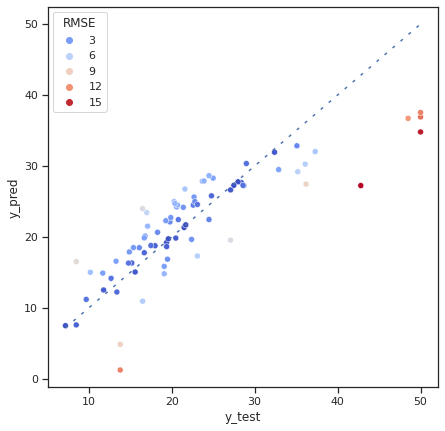

In [ ]:
X = df_sorted.iloc[:,1:13]
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
fit = elastic_net_regressor.fit(X_train, y_train)
y_pred = fit.predict(X_test)

test_pred_df = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred, 'RMSE':np.sqrt((y_test-y_pred)**2)})
plt.subplots(figsize=(7,7))

sns.scatterplot(x='y_test', y='y_pred', hue='RMSE', palette='coolwarm', data = test_pred_df)

X_plot = np.linspace(test_pred_df['y_test'].min(), test_pred_df['y_test'].max(), 100)
Y_plot = X_plot
plt.plot(X_plot, Y_plot, color='b', dashes=[2, 5, 2, 5])
plt.show()

* Con los métodos Lasso y ElasticNet se obtienen errores ligeramente por encima de los obtenidos con la regresión lineal y Ridge. Por otro lado con Lasso y ElasticNet el error obtenido es el mismo independientemente de la inclusión del atributo `CHAS` en la regresión